<a href="https://colab.research.google.com/github/Jorgee18/ADA-Informes/blob/main/Arbol_binario_de_b%C3%BAsqueda_%C3%B3ptimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de optimizacion**
**Entrada**: Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen claves ficticias $d_i$ que representan búsquedas fallidas con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

**Salida**: Construir un árbol de búsqueda óptimo, es decir, un árbol que minimice la cantidad esperada de nodos visitados (costo esperado). 

El Arbol binario de busqueda optimo es un arbol que proporciona un tiempo de busqueda lo mas pequeño posible para una secuencia dada en este caso la entrada antes mencionada, para hacer realidad esto se hace uso de dos tipos de programacion, una dinamica y otra recursiva. La finalidad de este algoritmo es crear un arbol que minimice la cantidad esperada de nodos visitados.

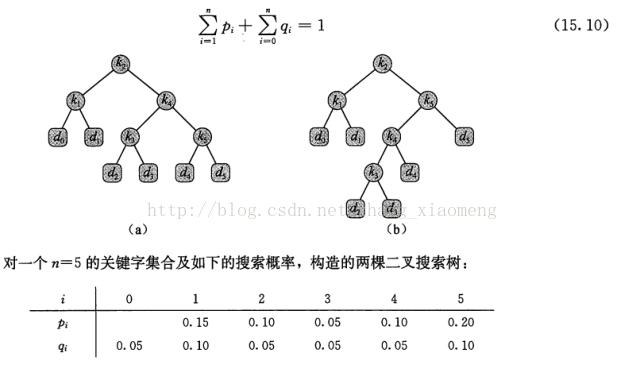

# 2. Descripcion del algoritmo

Arbol binario de búsqueda óptimo funcionara de la siguiente manera:

1. Primeramente se crea un matriz auxiliar que guardara los valores.

2. Se realiza una comparacion segun los nodos, si tenemos un nodo donde el coste es igual a la frecuencia del nodo y el segundo caso para cuando tenemos mas de un nodo donde su frecuencia es igual al coste, calculandose su respectivo coste.

3. Se guardan los valores iterativamente.

Arbol binario de búsqueda óptimo con programacion dinamica a diferencia del recurisvo este es modificable en cualquier momento de su ejecucion permitiendo rotaciones de arboles. Tiene una ventaja en su complejidad a comparacion del Arbol binario de búsqueda óptimo recursivo debido a que por medio del guardado de las operaciones anteriormente hechas, no es necesario el resolverlas nuevamente logrando asi un clara ventaja en comparacion de crear este algoritmo de manera recursiva.

Arbol binario de búsqueda óptimo con programacion recursiva el arbol puede ser modificado unicamente una sola vez que este ha sido construido. Este tipo de programacion es bastante ineficiente a comparacion de la programacion dinamica debido a que trantando de cumplir la misma funcion en este caso el costo optimo debe de resolver todos los subproblemas anteriores al actual debido a que estos no fueron almacenados en ninguna variable auxiliar, es por ello que aumentan significativamente su complejidad pero "optimizan" su memoria.

# 2.2 Algoritmo 
Se muestra la implementacion del algoritmo de arbol binario de busqueda optimo tanto recursivo como dinamico.


In [103]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout


In [15]:
def sum(freq, i, j):

	s = 0
	for k in range(i, j + 1):
		s += freq[k]
	return s

In [4]:
def optimal_bst_instance_generator(n):
    keys = sorted(rd.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q
    
keys, p, q = optimal_bst_instance_generator(10)

In [107]:
nullnodes=0
def generate_binary_tree(T,A):
    global nullnodes
    if len(A)==1: 
      T.add_node(A[0])
      return A[0]
    else:
      pivote = rd.randint(0,len(A)-1)
      T.add_node(A[pivote])

      if pivote > 0:
        left_node = generate_binary_tree(T,A[0:pivote])
        T.add_edge(A[pivote],left_node)
      elif pivote ==0: 
        T.add_edge(A[pivote],"nil"+str(nullnodes)); nullnodes+=1
      
      if pivote < len(A)-1:
        right_node = generate_binary_tree(T,A[pivote+1:])
        T.add_edge(A[pivote],right_node)
      else: 
        T.add_edge(A[pivote],"nil"+str(nullnodes)); nullnodes+=1

      return A[pivote]

In [110]:
#Arbol binario de busqueda optimo recursivo
cont = 0
def optimoCost(freq, i, j, verbose = False):
	global cont;
	if j < i:	 #Verifica si hay elementos en el sub arreglo.
		if verbose:
			print("No hay elementos en el sub arreglo se retorna 0 \n")
	 
		return 0

	if j == i: #Se encuentra un unico elemento en el sub arreglo y lo retorna.
		if verbose:
			print("Se encuentra un unico elemento en el sub arreglo siendo retornado", freq[i], '\n')
	 
		return freq[i]

	if verbose:
		print("Frecuencias:", freq,",", i,",", j)

	suma = sum(freq, i, j) #Suma las frecuencias.
	
	if verbose:
		print("Se suman todas las frecuencias: ",suma, "\n")

	Min = 999999999999 
	#Calcula el costo anterior y lo compara con el actual y mantiene el que sea mas optimo.
	for r in range(i, j + 1):
		cont+=2
		costo = (optimoCost(freq, i, r - 1) + optimoCost(freq, r + 1, j))
		if verbose:
			print("Se compara el costo anterior con el costo actual")
	 
		if costo < Min: #Compara el costo actual con el costo anterior y busca el mas optimo
			if verbose:
				print("Si el costo actual es menor al costo anterior")
				print(costo, "<", Min)
				print("Min = costo \n")
			Min = costo
		else:
			if verbose:
				print("Si el costo actual es mayor al costo anterior")
				print("Se mantiene el costo anterior")
				print("Min = Min \n")

	if verbose:
		print("Menor costo =", Min)
		print("Suma de Frecuencias =", suma)
		print("Menor costo encontrado =", Min + suma, "\n")
	return Min + suma

def optimalSearchTree(keys, freq, n, verbose = False):
	return optimoCost(freq, 0, n - 1, verbose)

# Driver Code
if __name__ == '__main__':
	keys = [10, 12, 20]
	freq = [34, 8, 50]
	n = len(keys)
	print("Cost of Optimal BST is",optimalSearchTree(keys, freq, n, True))
print("Cantidad de llamadas =", cont)


Frecuencias: [34, 8, 50] , 0 , 2
Se suman todas las frecuencias:  92 

Se compara el costo anterior con el costo actual
Si el costo actual es menor al costo anterior
66 < 999999999999
Min = costo 

Se compara el costo anterior con el costo actual
Si el costo actual es mayor al costo anterior
Se mantiene el costo anterior
Min = Min 

Se compara el costo anterior con el costo actual
Si el costo actual es menor al costo anterior
50 < 66
Min = costo 

Menor costo = 50
Suma de Frecuencias = 92
Menor costo encontrado = 142 

Cost of Optimal BST is 142
Cantidad de llamadas = 14


[1, 3, 6, 15, 16, 18, 19, 30, 33, 36, 40, 41, 46, 52, 54, 64, 78, 95, 96, 97]


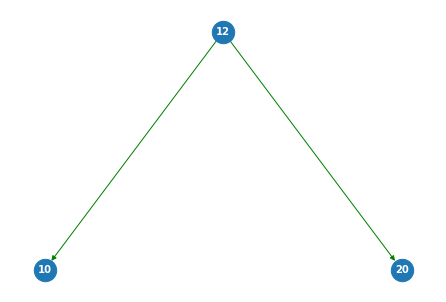

In [111]:
#Generamos y ordenamos un arreglo
A=rd.sample(range(100), 20)
A.sort()
print(A)

T = nx.DiGraph()
generate_binary_tree(T,keys)

pos = graphviz_layout(T, prog="dot")

# para mostrar los nodos en sus posiciones y colores, tamaños, etc.
nx.draw(T,pos, with_labels=True, node_size=500, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="green")

In [112]:
#Arbol binario de busqueda optimo dinamico
INT_MAX = 2147483647
cont2 = 0

def optimalSearchTreeDinamico(keys, freq, n, verbose = False):
  global cont2
  costo = [[0 for x in range(n)] for y in range(n)]

  for i in range(n):
    costo[i][i] = freq[i] 

  for l in range(2, n + 1):

    for i in range(n - l + 1):
      j = i + l - 1
      if verbose:
        print("Frecuencias:", freq,",", i,",", j)

      off_set_sum = sum(freq, i, j) #Suma de frecuencias
      if verbose:
        print("Se suman todas las frecuencias: ",off_set_sum, "\n")

      if i >= n or j >= n:
        break;
      costo[i][j] = INT_MAX #Se declara el maximo para encontrar el coto optimo
      
      if verbose:
        print("Se busca conseguir el costo mas optimo con los valores anteriormente calculados")
        print("Inicializacion para buscar el costo mucho mas optimo (costo[i][j]):", costo[i][j], "\n")
      for r in range (i, j + 1):
        cont2 += 1
        c = 0
        if (r > i):
          c += costo[i][r - 1]
        if (r < j):
          c += costo[r + 1][j]

        #Mediante la comparacion de el costo anterior y el costo actual se busca el costo mas optimo dentro del problema
        c += off_set_sum
        if verbose:
          print("Se calcula el costo mas optimo ""c"" y se compara con el costo anterior costo[i][j]")

        if (c < costo[i][j]): #Compara el costo nuevo con el anterior 
          if verbose:
            print("Si c < costo[i][j] se guarda el valor de c en costo[i][j]")
            print(c,"<", costo[i][j])
            print("costo[i][j] =",c,"\n")

          costo[i][j] = c #Se le asigna el nuevo costo optimo
        else:
          if verbose:
              print("Si costo[i][j] > c se mantiene el valor de costo[i][j]")
              print(costo[i][j],">", c)
              print("costo[i][j] =", costo[i][j], "\n")
    if verbose:
      print("------------------------------------------------------------------------------------------------------")

  return costo[0][n - 1] #Retorna el costo optimo 

# Driver Code
if __name__ == '__main__':
	keys = [10, 12, 20]
	freq = [34, 8, 50]
	n = len(keys)
	print("Cost of Optimal BST is",
		optimalSearchTreeDinamico(keys, freq, n, True))
print("Cantidad de llamadas", cont2)


Frecuencias: [34, 8, 50] , 0 , 1
Se suman todas las frecuencias:  42 

Se busca conseguir el costo mas optimo con los valores anteriormente calculados
Inicializacion para buscar el costo mucho mas optimo (costo[i][j]): 2147483647 

Se calcula el costo mas optimo c y se compara con el costo anterior costo[i][j]
Si c < costo[i][j] se guarda el valor de c en costo[i][j]
50 < 2147483647
costo[i][j] = 50 

Se calcula el costo mas optimo c y se compara con el costo anterior costo[i][j]
Si costo[i][j] > c se mantiene el valor de costo[i][j]
50 > 76
costo[i][j] = 50 

Frecuencias: [34, 8, 50] , 1 , 2
Se suman todas las frecuencias:  58 

Se busca conseguir el costo mas optimo con los valores anteriormente calculados
Inicializacion para buscar el costo mucho mas optimo (costo[i][j]): 2147483647 

Se calcula el costo mas optimo c y se compara con el costo anterior costo[i][j]
Si c < costo[i][j] se guarda el valor de c en costo[i][j]
108 < 2147483647
costo[i][j] = 108 

Se calcula el costo mas op

[10, 20, 21, 32, 38, 40, 41, 42, 59, 62, 63, 69, 75, 80, 83, 85, 88, 90, 92, 97]


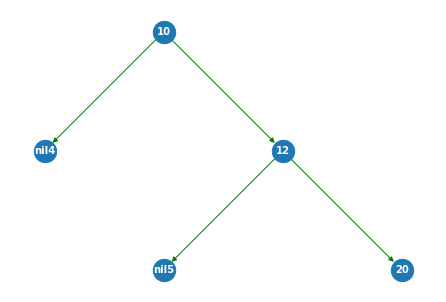

In [114]:
#Generamos y ordenamos un arreglo
A=rd.sample(range(100), 20)
A.sort()
print(A)

T = nx.DiGraph()
generate_binary_tree(T,keys)

pos = graphviz_layout(T, prog="dot")

# para mostrar los nodos en sus posiciones y colores, tamaños, etc.
nx.draw(T,pos, with_labels=True, node_size=500, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="green")

# 2.3. Ejemplo
Ejemplo de un arreglo y las comparaciones que hace.

# 3. Tiempo de ejecucion
## **Teorema (Tiempo de ejecucion).**

Peor caso.

## Prueba del teorema

# 4. Correctitud

### **Teorema (Correctitud).**

## Subestructura óptima

Una subestructura optima explica que mediante el uso de soluciones optimas de subproblemas podemos llegar a la solucion de un mismo problema en toda su totalidad. Habiendo explicado la base se subestructura optima debemos relacionarlo con el problema del arbol con minimo coste,usando subestructura optima consiste que en cada subproblema uno selecciona una clave como nodo raiz y que dada esta debemos obtener el coste minimo, basandonos en el coste minimo de los subproblemas que se forman de ella.

Fomrula subestructura optima recursivo (Costo optimo)

image.png

## Prueba del Teorema

Vamos a probar la correctitud de la version dinamica. Para esto debemos primeramente resolver el problema original en un algoritmo dinamico es resolver una cantidad de subproblemas previos.

Sea 1 <= i <= j <= n y T sea cualquier BST en i,....j.

Definiendo el costo como:


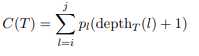

Y el costo de los subproblemas es:

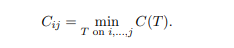

Esto se vincula con la subestructura optima explicada anteriormente y que esta nos permite resolver y guardar los subproblemas para ir combinandolos y llegar al resultado esperado, siendo este el original.

### **Relacion de recurrencia**

Supongamos que la raiz de T en i,.......j es k

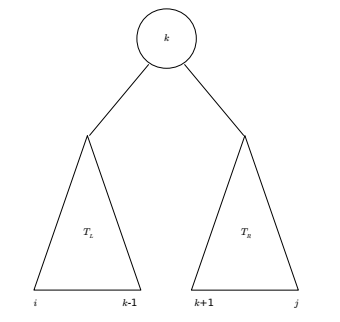

El costo de T es:

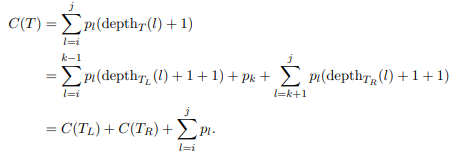

Y entonces podemos definir la siguiente ecuacion de recurrencia.

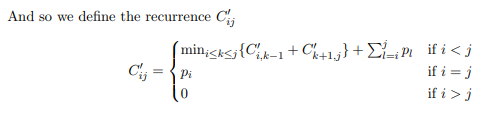

### **El teorema de correctitud**

El algoritmo BST entrega correctamente el costo esperado de una secuencia de claves y sus probabilidades.

### **Prueba del teorema**

Para probar el teorema se utilizara induccion matematica.

### **Caso base:**

Es cuando tenemos un arreglo de tamaño 1 debido a que al ser de este tamaño retorna automaticamente el nodo con el costo optimo que es igual a su frecuencia.

### **Caso inductivo:**
Para el caso inductivo hay dos casos 

Caso 1: Ci,j ≤ C''i,j previo al calculo C''i,j es el costo de algun BST en i,......j y Ci,j es el costo de un BST optimo.

Caso 2: Ci,j >= C''i,j Supongamos que la raiz de el BST optimo es k entonces.


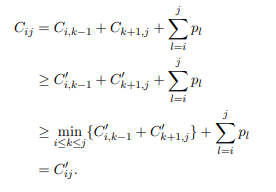

Como podemos observar a traves de la imagenes la ultima ecuacion nos retorna al problema original confirmando nuestra hipotesis y demostracion. Debido a que si Ci,j ≤ C''i,j este es menor aseguramos que es un costo optimo mientras que si es mayor o igual es la raiz del arbol binario optimo tal y como podemos ver en la siguiente imagen.

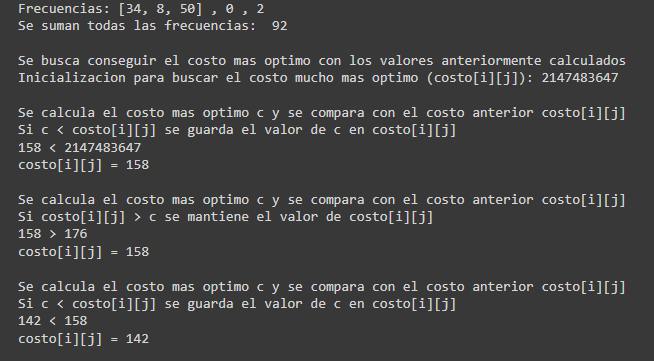

# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente,
* cantidad de comparaciones del mejor caso calculadas matemáticamente (n-1 comparaciones si el arreglo está ordenado)
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,100]$.

Los arreglos de entrada son:

*   Mejor caso: La secuencia será un arreglo ordenado de $0$ hasta $n-1$.
*   Peor caso: La secuencia será un arreglo ordenado de $n-1$ hasta $0$.
*   Caso aleatorio: La secuencia será un arreglo aleatorio de números entre 1 y 99, con $n$ cantidad de elementos.

Como ejemplo del mejor y peor caso, se pueden observar las demostraciones anteriores, donde $n$ es reemplazado por 5.

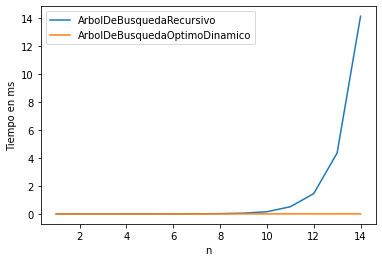

In [122]:
x=[]
y_Dynamic = []
y_NoDynamic = []

for n in range(1,15):
  keys, freq, q = optimal_bst_instance_generator(n)
  cont = 0
  cont2 = 0
  #la función repeat está ejecutando 20 veces corteDeVarillaDinamico con el arreglo b y retorna el mejor tiempo obtenido.
  t_Dynamic = repeat(setup="from __main__ import optimalSearchTreeDinamico", stmt=f"optimalSearchTreeDinamico({keys},{freq},{len(keys)})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces corteDeVarillaRecursivo con el arreglo a y retorna el mejor tiempo obtenido.
  t_NoDynamic = repeat(setup="from __main__ import optimalSearchTree", stmt=f"optimalSearchTree({keys},{freq},{len(keys)})", repeat=1, number=10)

  x.append(n)
  y_Dynamic.append(t_Dynamic)
  y_NoDynamic.append(t_NoDynamic)

plt.plot(x,y_NoDynamic)
plt.plot(x,y_Dynamic)
plt.legend(["ArbolDeBusquedaRecursivo","ArbolDeBusquedaOptimoDinamico"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Como se puede apreciar, el algoritmo con programación dinámica toma bastante ventaja en comparación al recursivo ya que este último debe realizar varios calculos repetitivos los cuales no realiza en el algoritmo dinámico provocando una baja bastante grande en la cantidad de calculos realizados. También en el gráfico anterior se puede aprecia claramente la complejidad del algoritmo recursivo la cual es de $O(2^n)$, en cambio la complejidad en programación dinámica es de $O(n^3)$ la cual no se logra apreciar muy bien por como creece en comparación a la otra función.

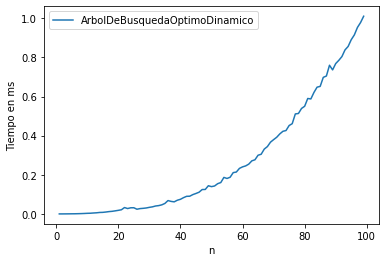

In [121]:
x=[]
y_Dynamic = []

for n in range(1,100):
  keys, freq, q = optimal_bst_instance_generator(n)
  cont = 0
  cont2 = 0
  #la función repeat está ejecutando 20 veces corteDeVarillaDinamico con el arreglo b y retorna el mejor tiempo obtenido.
  t_Dynamic = repeat(setup="from __main__ import optimalSearchTreeDinamico", stmt=f"optimalSearchTreeDinamico({keys},{freq},{len(keys)})", repeat=1, number=10)

  x.append(n)
  y_Dynamic.append(t_Dynamic)

plt.plot(x,y_Dynamic)
plt.legend(["ArbolDeBusquedaOptimoDinamico"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()